# Problem Statement:
## Predict a price range, indicating how high the price is, using K-Nearest Neighbors
algorithm. 

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mobile_data.csv')
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [3]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [4]:
df.shape

(2000, 15)

In [5]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [6]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

<AxesSubplot:>

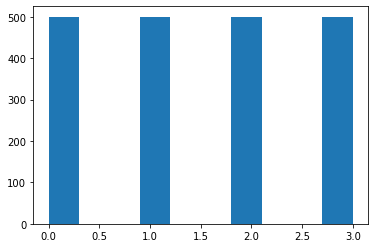

In [7]:
df.price_range.hist(grid = False)

In [8]:
# df.price_range = df.price_range.astype('int')

In [9]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [10]:
df.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

<AxesSubplot:>

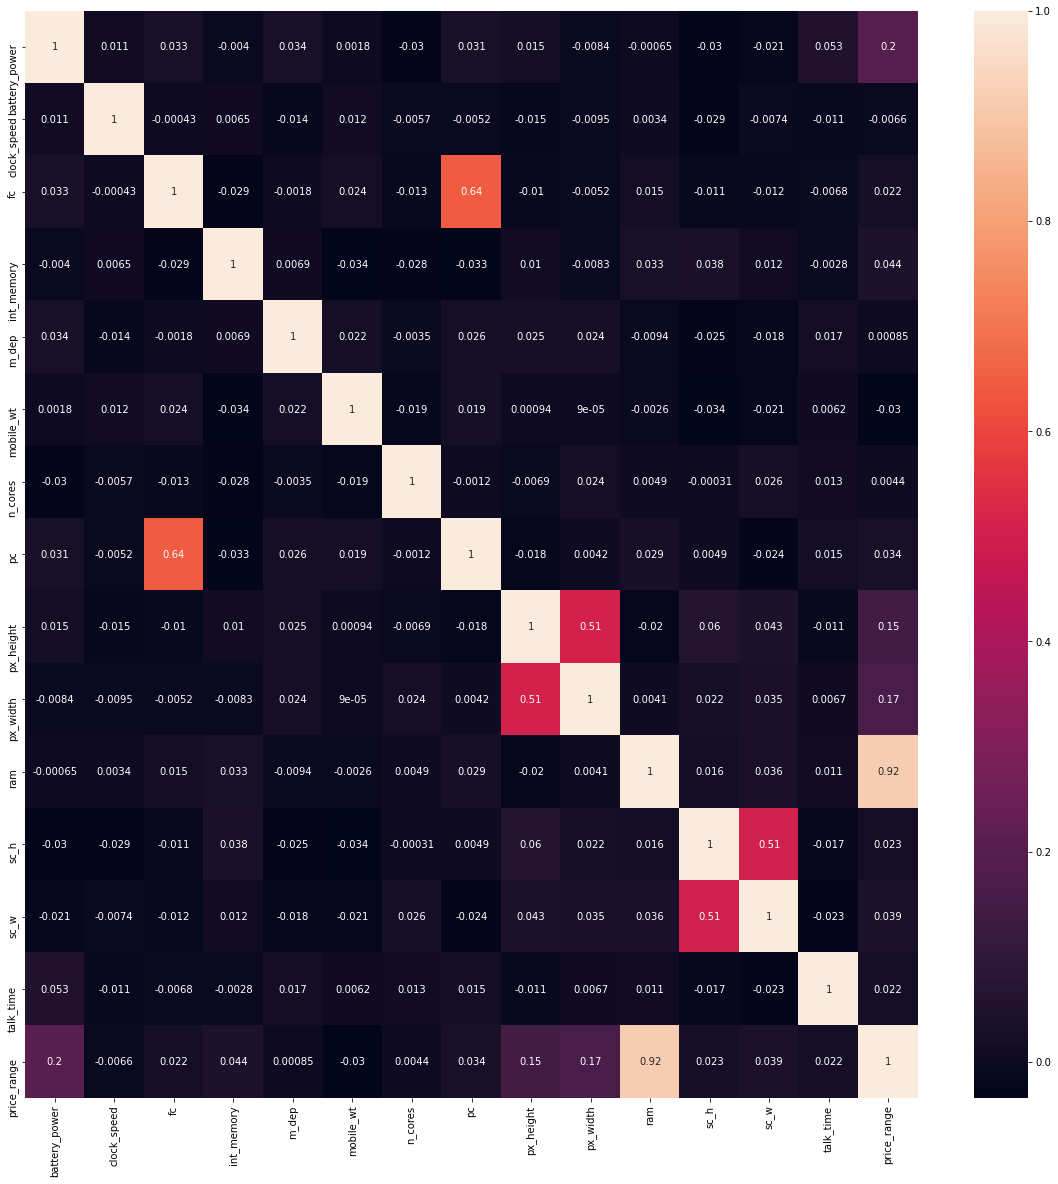

In [79]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='ram', ylabel='price_range'>

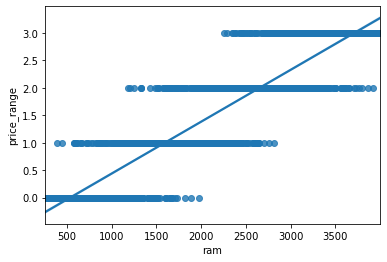

In [82]:
# price_range and ram show a correlation of 0.92

sns.regplot(x = df.ram, y =df.price_range, data = df)

<AxesSubplot:xlabel='pc', ylabel='fc'>

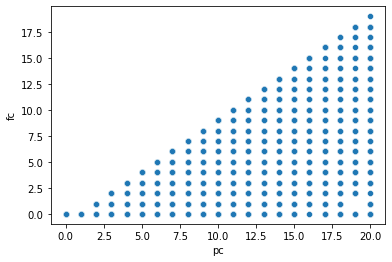

In [70]:
# pc and fc : Correlation is good - 0.64
# pc - PRIMARY CAMERA MEGAPIXEL
# fc - FRONT CAMERA MEGAPIXEL

sns.scatterplot(x = df.pc, y =df.fc, data = df)

In [12]:
# Defining x and y

x = df.drop(columns='price_range', axis = 1)
y = df.price_range

#### Trying Feature Scaling 

In [83]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

xScaled  = x.apply(zscore)  # convert all attributes to Z scale 

xScaled.describe()

,battery_power,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,9.230117e-17,-8.754109e-17,1.804112e-16,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.928904e-01,-1.656260e+00,-1.702391e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00
25%,-8.804033e-01,-7.624947e-01,-8.845346e-01,-8.829695e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01
50%,-2.849593e-02,-3.017032e-01,-2.563229e-03,2.122020e-02,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03
75%,8.575560e-01,6.198797e-01,8.794082e-01,8.406421e-01,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01
max,1.728812e+00,3.384628e+00,1.761380e+00,1.688320e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00


In [92]:
# Split X and y into training and test set in 70:30 ratio
# try with scaling and without scaling 

# without scaling score is 94
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

### Model


In [93]:
NNH = KNeighborsClassifier(n_neighbors= 12,metric='euclidean' )
NNH.fit(x_train, y_train)
print(NNH.score(x_train, y_train))
NNH.score(x_test, y_test)

0.9414285714285714


0.94

### Confusion Matrix


Confusion Matrix


<AxesSubplot:>

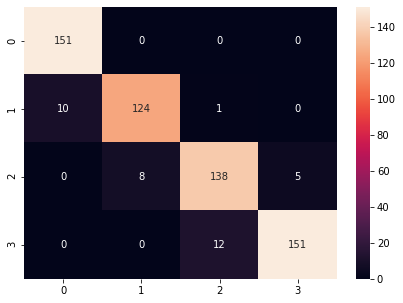

In [94]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
predicted_labels = NNH.predict(x_test)
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[0,1,2,3])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1,2,3]],
                  columns = [i for i in [0,1,2,3]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

### Using Support Vector Machine  (SVM)
Goal is to improve the score

In [95]:
from sklearn import svm

In [96]:
support = svm.SVC(kernel = 'linear')

In [97]:
support.fit(x_train, y_train)

SVC(kernel='linear')

In [98]:
print(support.score(x_train, y_train))
print(support.score(x_test, y_test))

0.9928571428571429
0.9683333333333334


In [99]:
# Tuning the parameters 

In [100]:
support1 = svm.SVC(gamma = 0.3, kernel = 'poly')

In [101]:
support1.fit(x_train, y_train)
print(support1.score(x_train, y_train))
support1.score(x_test, y_test)

1.0


0.9716666666666667